In [27]:
import os.path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from _lib.raman_lib.visualization import boxplot_comparison

# Setup

In [28]:
dataset = "Enterobacter"

In [29]:
# starting_dirs = ["GroupK", "RepeatedKFold", "StratifiedK", "UnstratifiedK"]
starting_dirs = ["StratifiedK", "UnstratifiedK", "RepeatedKFold"]
results_path = "result"


In [30]:
data = {}
for d in starting_dirs:
    data[d] = pd.read_csv(os.path.join(d, results_path, dataset, dataset + "_preprocessed.csv"))


# Quality Control

In [31]:
qc_results = {}
for d in starting_dirs:
    qc_results[d] = pd.read_csv(os.path.join(d, results_path, dataset, dataset + "_qc_scores.csv"))

for k, v in qc_results.items():
    print(k + ": \n", v.describe(), "\n")

StratifiedK: 
        Median Height     N Peaks
count     120.000000  120.000000
mean      193.632198    7.633333
std        93.745274    1.028447
min        88.852769    5.000000
25%       131.727661    7.000000
50%       165.936787    8.000000
75%       226.948817    8.000000
max       512.287779   10.000000 

UnstratifiedK: 
        Median Height     N Peaks
count     120.000000  120.000000
mean      193.632198    7.633333
std        93.745274    1.028447
min        88.852769    5.000000
25%       131.727661    7.000000
50%       165.936787    8.000000
75%       226.948817    8.000000
max       512.287779   10.000000 

RepeatedKFold: 
        Median Height     N Peaks
count     120.000000  120.000000
mean      193.632198    7.633333
std        93.745274    1.028447
min        88.852769    5.000000
25%       131.727661    7.000000
50%       165.936787    8.000000
75%       226.948817    8.000000
max       512.287779   10.000000 


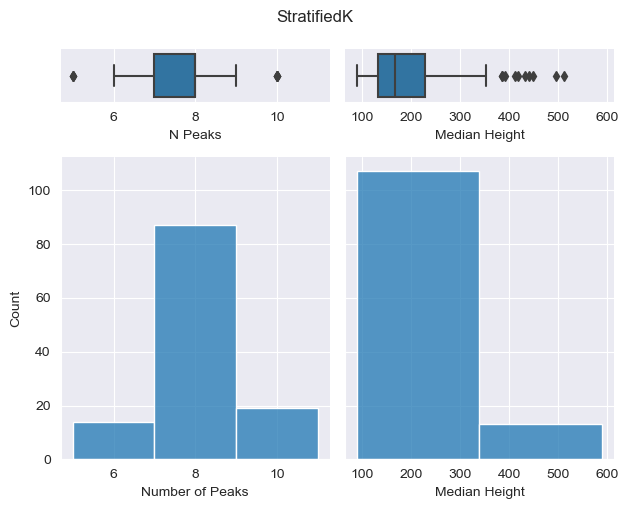

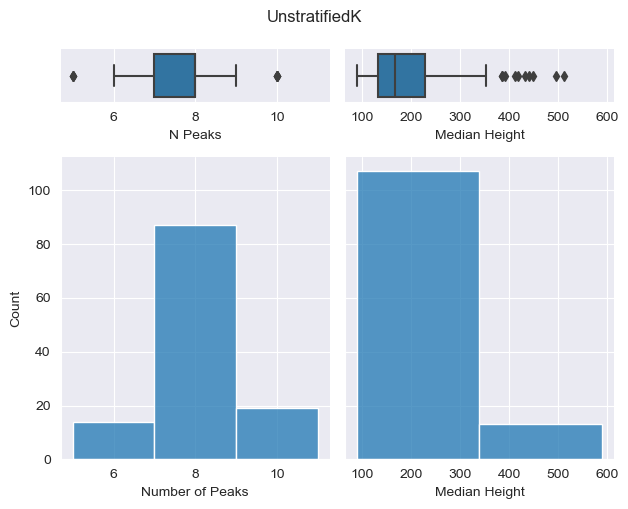

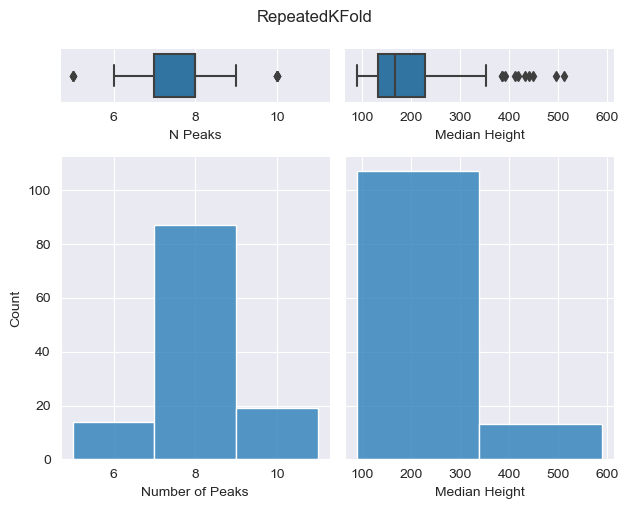

In [32]:
for r in qc_results.keys():
    fig, ((ax_box1, ax_box2), (ax_hist1, ax_hist2)) = plt.subplots(
        2, 2, sharex="col", sharey="row", gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=qc_results[r].iloc[:, 1], ax=ax_box1)
    sns.boxplot(x=qc_results[r].iloc[:, 0], ax=ax_box2)
    sns.histplot(qc_results[r].iloc[:, 1], ax=ax_hist1, binrange=None, binwidth=2)
    sns.histplot(qc_results[r].iloc[:, 0], ax=ax_hist2, binrange=None, binwidth=250)

    ax_box1.set(yticks=[])
    ax_box2.set(yticks=[])
    sns.despine(ax=ax_hist1)
    sns.despine(ax=ax_hist2)
    sns.despine(ax=ax_box1, left=True)
    sns.despine(ax=ax_box2, left=True)

    ax_hist1.set_xlabel("Number of Peaks")
    ax_hist2.set_xlabel(qc_results[r].columns[0])

    ax_box1.tick_params(axis="x", labelbottom=True)
    ax_box2.tick_params(axis="x", labelbottom=True)
    fig.tight_layout()
    fig.suptitle(r, y=1.05)

# Load Accuracy and F1 Files

In [33]:
accs = {}
acc_file = "mean_test_accuracy.csv"

f1_accs = {}
f1_file = "mean_test_f1.csv"

lda = "lda_dim_reduction"
lda_subdirs = ["lda", "fa_lda", "pca_lda", "peak_lda"]

reg = "regularized_models"
reg_subdirs = ["logreg_l1", "logreg_l2", "svm_l1", "svm_l2"]

tree = "tree_based_models"
tree_subdrirs = ["decision_tree", "random_forest", "gbdt"]

load the data from the csv files and put it into a list first

In [34]:
# foreach validation method store the data in a list first
# due to the different sizes of the csv we need to create a jagged dataframe once all are loaded
for d in starting_dirs:
    data_acc = {}
    data_f1 = {}
    for s in lda_subdirs:
        tmp_data_acc = pd.read_csv(os.path.join(d, results_path, dataset, lda, s, acc_file), header='infer',
                                   index_col=0)
        data_acc[s] = tmp_data_acc['0'].values.tolist()

        tmp_data_f1 = pd.read_csv(os.path.join(d, results_path, dataset, lda, s, f1_file), header='infer',
                                   index_col=0)
        data_f1[s] = tmp_data_acc['0'].values.tolist()

    for s in reg_subdirs:
        tmp_data_acc = pd.read_csv(os.path.join(d, results_path, dataset, reg, s, acc_file), header='infer',
                                   index_col=0)
        data_acc[s] = tmp_data_acc['0'].values.tolist()

        tmp_data_f1 = pd.read_csv(os.path.join(d, results_path, dataset, reg, s, f1_file), header='infer',
                                  index_col=0)
        data_f1[s] = tmp_data_acc['0'].values.tolist()

    for s in tree_subdrirs:
        tmp_data_acc = pd.read_csv(os.path.join(d, results_path, dataset, tree, s, acc_file), header='infer',
                                   index_col=0)
        data_acc[s] = tmp_data_acc['0'].values.tolist()

        tmp_data_f1 = pd.read_csv(os.path.join(d, results_path, dataset, tree, s, f1_file), header='infer',
                                  index_col=0)
        data_f1[s] = tmp_data_acc['0'].values.tolist()

    accs[d] = data_acc
    f1_accs[d]=data_f1


In [35]:
# turn the loaded data into a jagged dataframe by using the method pd.concat
accs_df = {}
f1_df = {}
for d in starting_dirs:
    acc_df_list = []
    for key in accs[d]:
        acc_df_list.append(pd.DataFrame(accs[d][key], columns=[key]))
    accs_df[d] = pd.concat(acc_df_list, axis=1)

    f1_df_list = []
    for key in f1_accs[d]:
        f1_df_list.append(pd.DataFrame(accs[d][key], columns=[key]))
    f1_df[d] = pd.concat(f1_df_list, axis=1)

accs = accs_df
f1_accs = f1_df



# Create Boxplot with accuracy values
## Analysis per validation method --> compare classification methods

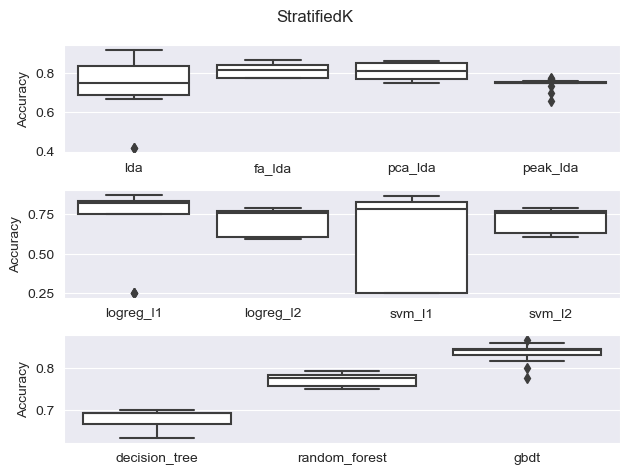

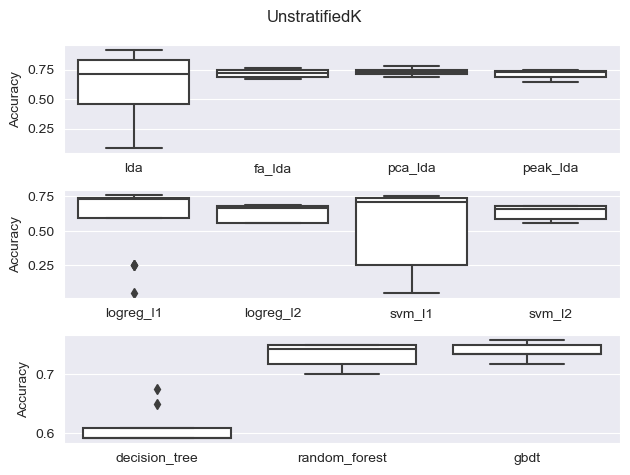

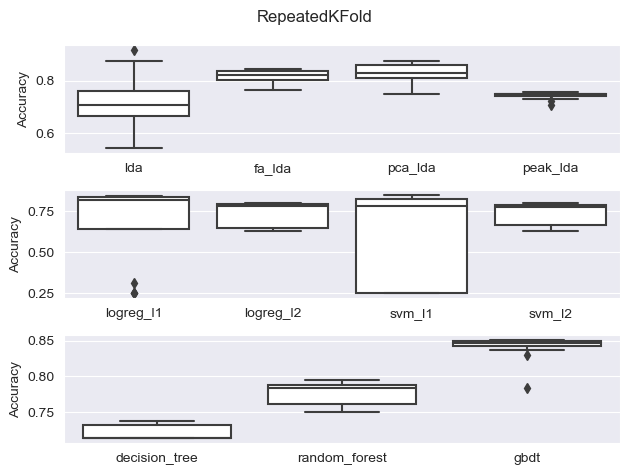

In [36]:
for d in starting_dirs:
        fig, ((ax_box1), (ax_box2), (ax_box3)) = plt.subplots(
        nrows=3, ncols=1)
        
        boxplot_comparison(accs[d], regex="lda", ax=ax_box1)
        ax_box1.set_ylabel('Accuracy')
    
        boxplot_comparison(accs[d], regex="logreg|svm", ax=ax_box2)
        ax_box2.set_ylabel('Accuracy')
    
        boxplot_comparison(accs[d], regex="tree|gbdt|forest", ax=ax_box3)
        ax_box3.set_ylabel('Accuracy')
    
        fig.suptitle(d)
        fig.tight_layout()

## Analysis per classification method --> compare validation methods

In [37]:
# map the data so that an analysis per classification method is possible
cls_methods_dict = {}

for d in starting_dirs:
    for col in accs[d].columns:
        if col not in cls_methods_dict:
            cls_methods_dict[col] = {}
        cls_methods_dict[col][d]=accs[d][col]

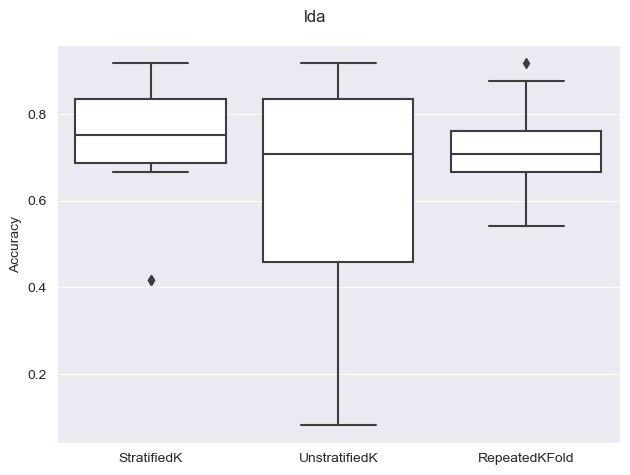

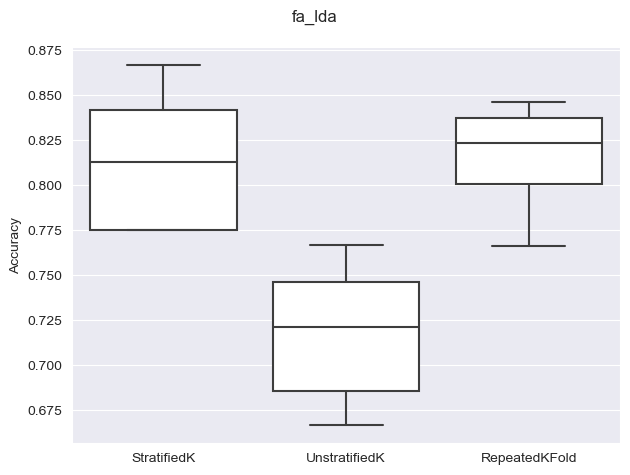

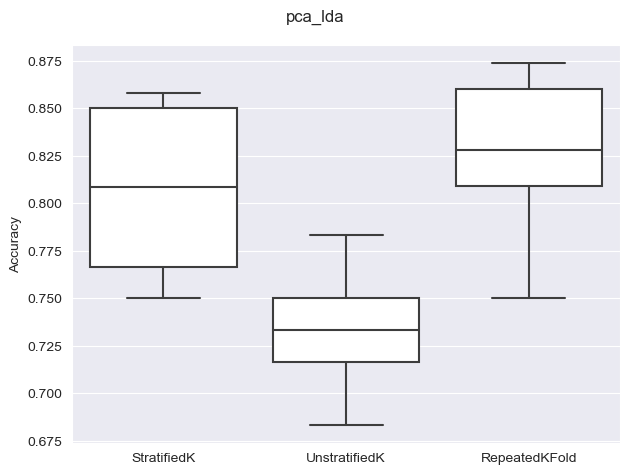

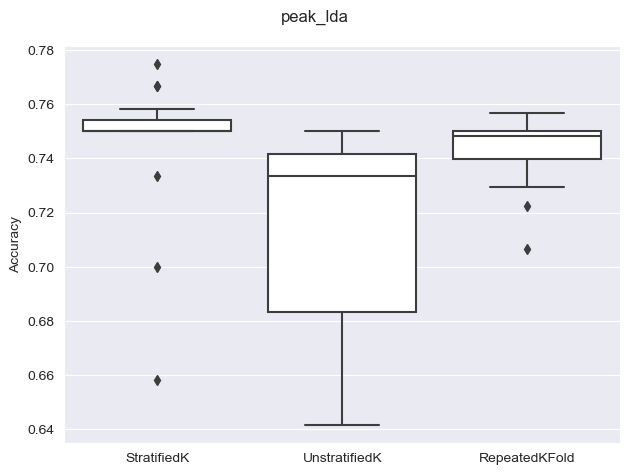

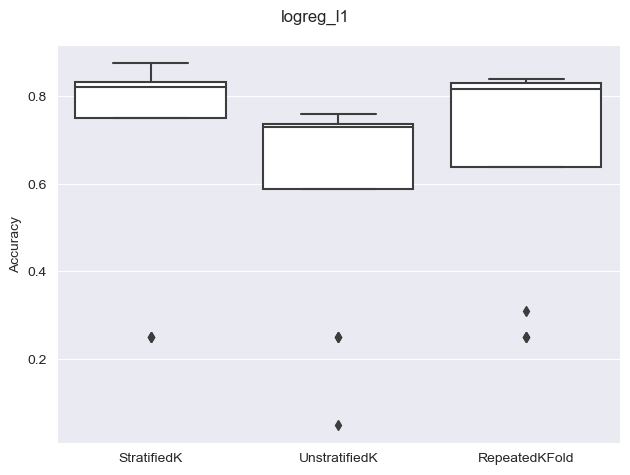

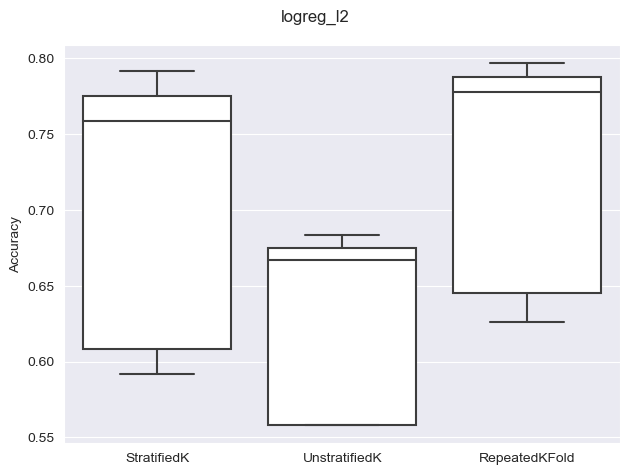

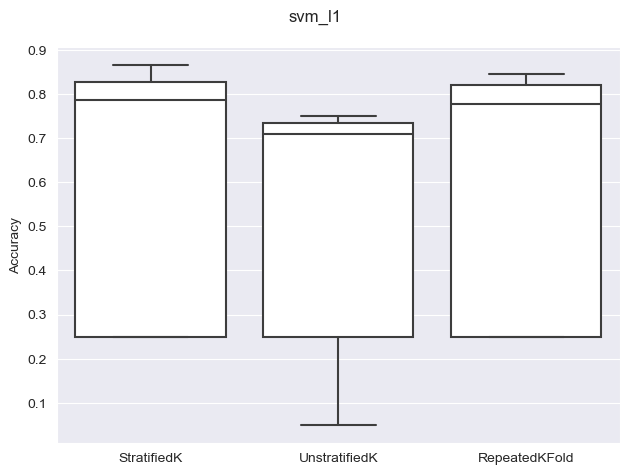

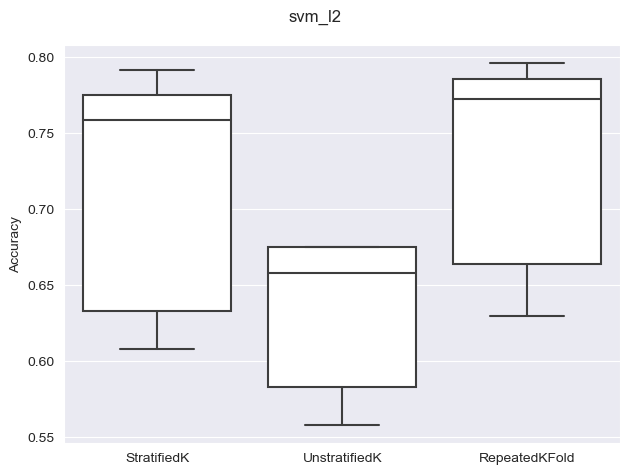

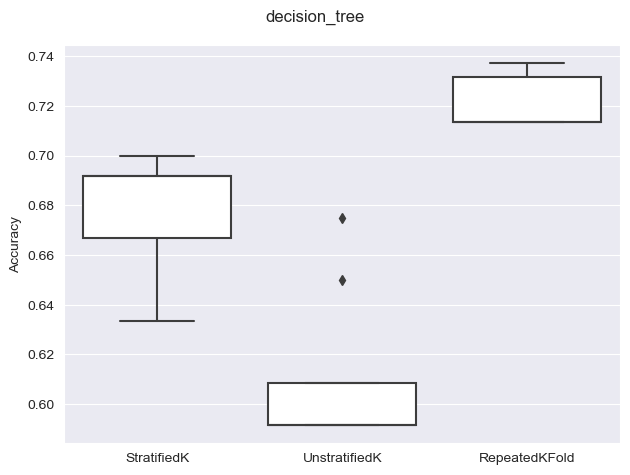

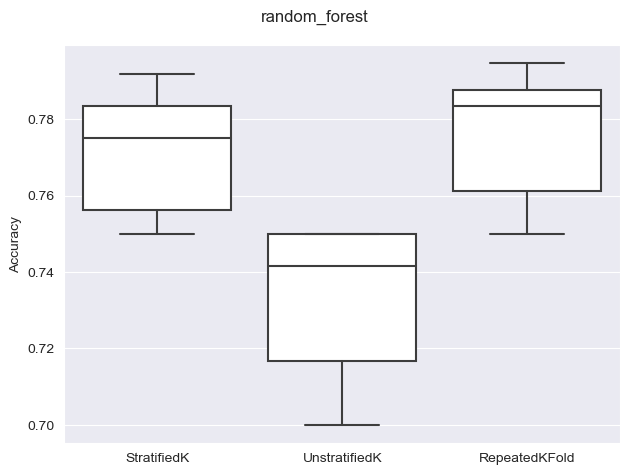

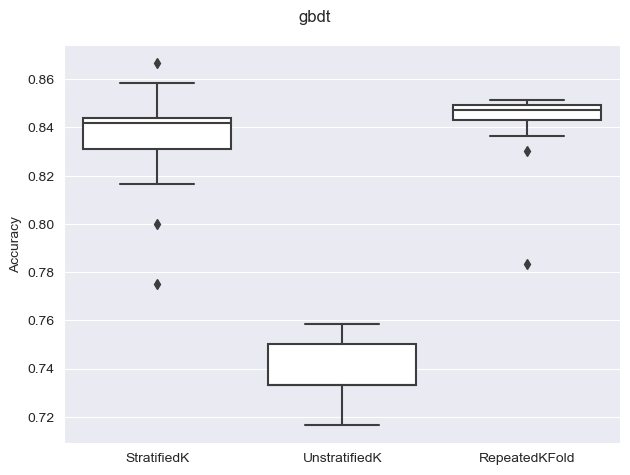

In [38]:
cls_methods = lda_subdirs+reg_subdirs+tree_subdrirs

for m in cls_methods:
    fig, ax = plt.subplots(
        nrows=1, ncols=1)
    
    boxplot_comparison(cls_methods_dict[m], ax=ax)
    ax.set_ylabel('Accuracy')
    fig.suptitle(m)
    fig.tight_layout()

# Create Boxplot with f1 score

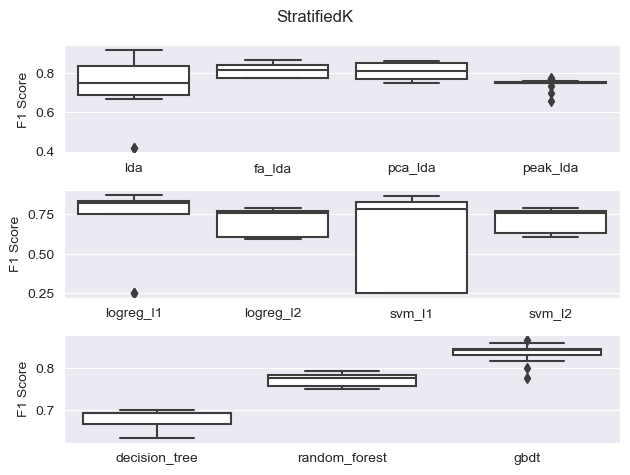

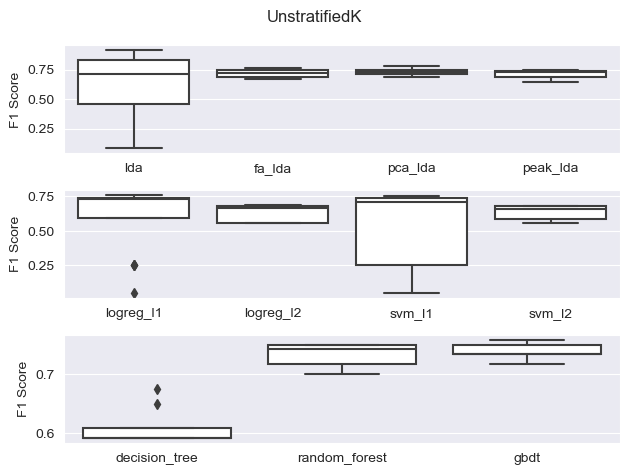

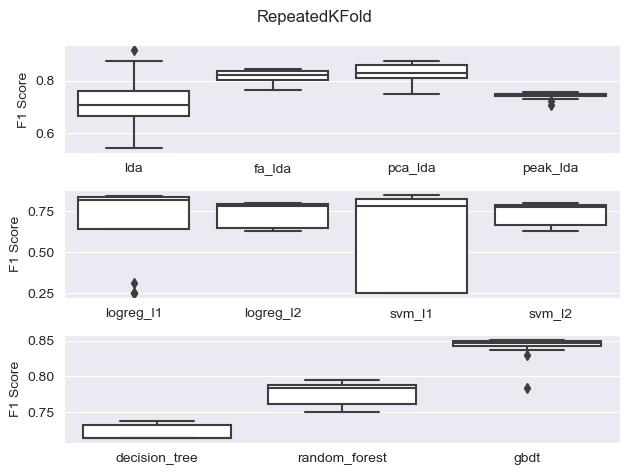

In [39]:
for d in starting_dirs:
    fig, ((ax_box1), (ax_box2), (ax_box3)) = plt.subplots(
        nrows=3, ncols=1)
    boxplot_comparison(f1_accs[d], regex="lda", ax=ax_box1)
    ax_box1.set_ylabel('F1 Score')

    boxplot_comparison(f1_accs[d], regex="logreg|svm", ax=ax_box2)
    ax_box2.set_ylabel('F1 Score')

    boxplot_comparison(f1_accs[d], regex="tree|gbdt|forest", ax=ax_box3)
    ax_box3.set_ylabel('F1 Score')

    fig.suptitle(d)
    fig.tight_layout()